# Assignment 4

## Question 1
Suppose $ X_1, X_2,... , X_n \sim F $ (iid draws) and $ Y_1, Y_2,... , Y_n $ is a Markov chain with F as the stationary distribution. Consider two estimates of the mean:
$$  X=\frac{1}{n} \Sigma^{n}_{i=1}X_i 	 { \;\;\; and \;\;\; }	 Y= \frac{1}{n} \Sigma^{n}_{i=1}Y_i .$$
Which estimator is better? In other words, which estimator has smaller variance? Support your answer with formal mathematical arguments.

## Solution 1
We are given with 2 sets of draws. One will be $ iid $ draws, while the other will be a result of Markov chain. We know, according to $theorem\;1$,
Let F be a distribution such that $X_0 \sim F.$ The distribution F is the invariant or stationary distribution if $F\: P = F.$ That is, if for all $A \in B(\chi)%$
$$ F P(A) = \int _{\chi} P(x, A)F(dx) = F(A). $$

This means that if we start from F, and use P to get another sample, then the next sample is also from F. However, these results are not $i.i.d$

The issue with that is, according to the initial condition, if it is far from the mean of the stationary distribution at a point where the likelyhood of accepting the proposal is low, it will take multiple iterations to return to the point where there is higher probability distribution. We can hence see this causes multiple samples which are farther away from the mean. This results in an error in the calculation, which will reduce as the number of iterations increase. This is because even though it is not $i.i.d.$, it will still follow $W.L.L.N$.

However, if we start from a point with higher probability, we will get samples closer to the mean. Since it follows $W.L.L.N$, we get that it will give an estimator which is as good as $i.i.d.$

## Question 2
Suppose $Y_1, Y_2, ..., Y_n| \mu \sim N(\mu, 1).$ Assume the prior on $ \mu \sim t_\nu $, where $\nu$ is the degrees of freedom. Assume the prior on $\\ \nu \sim Truncated\; Gamma(a_0, b_0,(2,\infty)),$ where $(2,\infty)$ is the support of Truncated Gamma.

- What is the joint posterior distribution of $(\mu, \nu)$?
- Write an MH algorithm to sample from the above posterior distribution.
- Generate n=100 data points. Set $a_0=2, b_0=0.1,$ and run the MH algorithm described above.

## Solution
1. Joint Posterior distribution:

$$
f(x, \mu, \nu) \propto \frac{1}{\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2}}\frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})} (1+\frac{\mu^2}{\nu})^{\frac{-(\nu+1)}{2}} \frac{b_0^{a_0}}{\Gamma(a_0)}\nu^{a_0-1}e^{-b_0 \nu}I(\nu>2)
$$

2. We shall follow the Metropolis Hastings Algorithm, where we sample from the given distributions of truncated $Gamma$ to obtain the $\nu$ and $\mu$ values. We shall use $Normal$ distribution to obtain the $x$ value as proposal.
The algorithm is as follows:
    a. Set starting value as $x_1 = 0 \; and \; \nu _1$ where $\nu _1$ is greater than 2. Also set $\mu _1$ as 0.

    b. Loop starts:

    c. Draw $\nu *$ from $Truncated\; Gamma(a_0, b_0, (2, \infty))$. Also draw $\mu *$ from $t_{\nu*}$.

    d. Draw $x*$ from $Normal(x_1, 1)$.

    e. Calculate 
    $$ \alpha(x_t, \mu _t, \nu _t, x*, \mu*, \nu*) = min\{1, \frac{f(x*, \mu*, \nu*) . pdf(x_t|x*, 1)}{f(x_t, \mu _t, \nu _t).pdf(x*|x_t, 1)}\}$$
    Here, $pdf(x|\mu, var)$ represents Probability density function of normal distribution, where $x$ is the value at which pdf is to be evaluated with the parameters appearing after the $|$. However, since the Normal distribution is symmetric, the $pdf's$ will get cancelled. We will not need to factor in the other variables taken in as they are already accounted for in the equation.
    Therefore, the $\alpha$ term will become: 
    $$ \alpha(x_t, \mu _t, \nu _t, x*, \mu*, \nu*) = min\{1, \frac{f(x*, \mu*, \nu*)}{f(x_t, \mu _t, \nu _t)}\}$$

    f. Draw $U \sim U[0,1]$. If $U < \alpha$ set $x_{t+1} = x*$ else $x_{t+1} = x_t$.

    g. Go to step 2.

    
3. We shall implement the above steps in code, for $n=100,\; a_0 = 2, b_0 = 0.1$.

In [ ]:
import Pkg;
Pkg.add("SpecialFunctions")
import Pkg;
Pkg.add("Distributions")
import Pkg;
Pkg.add("Plots")
using Pkg
Pkg.add("StatsPlots")

In [24]:
using Distributions
using SpecialFunctions
using StatsPlots
function getPosterior(x, mu, nu, a, b)
    return exp(-(x-mu)^2/2)*gamma((nu+1)/2)/(nu*pi)^0.5/gamma(nu/2)*(1+mu^2/nu)^(-(nu+1)/2)*nu^(a-1)*exp(-b*nu)
end

getPosterior (generic function with 1 method)

Mean of the obtained samples: 0.0929166037924506
The variance: 2.8533779542799738


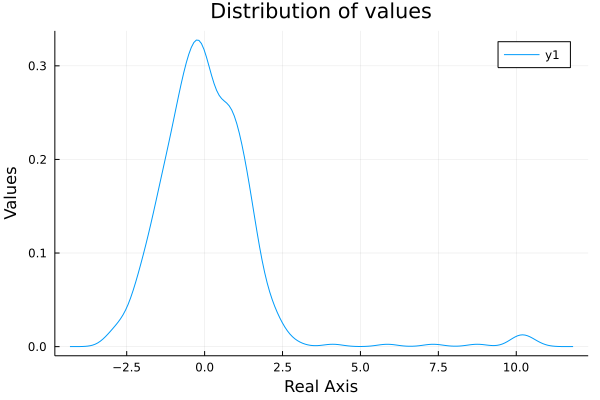

In [31]:
using Plots
n = 0
x_t = 10
mu_t = 0
nu_t = 3
a = 2
b = 0.1
nu_new = rand(Truncated(Gamma(a, b), 2, Inf))
mu_new = rand(TDist(nu_new))
nu_t = nu_new
mu_t = mu_new
vals = Array{Float64, 1}(undef, 500)

while n < 500
    x_new = rand(Normal(x_t, 1))
    nu_new = rand(Truncated(Gamma(a, b), 2, Inf))
    mu_new = rand(TDist(nu_new))
    alpha = 0
    temp = getPosterior(x_new, mu_new, nu_new, a, b)/getPosterior(x_t, mu_t, nu_t, a, b)
    if temp < 1
        alpha = temp
    else
        alpha = 1
    end
    uval = rand(Uniform(0, 1))
    if uval < alpha
        x_t = x_new
        mu_t = mu_new
        nu_t = nu_new
        n = n + 1
        vals[n] = x_t
    # else
    #     n = n + 1
    #     vals[n] = x_t
    end
end

println("Mean of the obtained samples: ", mean(vals))
println("The variance: ", var(vals))

density(vals, title = "Distribution of values")
xlabel!("Real Axis")
ylabel!("Values")

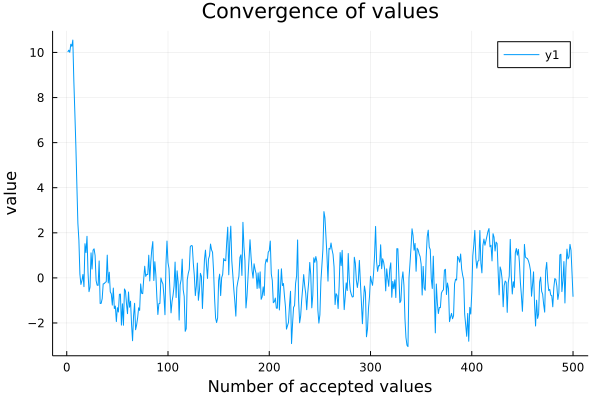

In [32]:
plot(vals, title = "Convergence of values")
xlabel!("Number of accepted values")
ylabel!("value")

Therefore, we can see the regression causes convergance, and the resulting values are from the normal distribution.

## Question 3
Consider the Bayesian linear regression model. The likelihood is 
$$y_1, y_2,... , y_n|\beta, \sigma ^2 \sim N_n(X\beta,\;\; \sigma ^2 I_n)$$
The parameters of interest are $\beta, \sigma ^2 ,$ just like regular MLE. We assume priors:
$$\beta \sim N_p( \mu , \sigma^2I_p)  \;\;\; and \;\;\;  \sigma^2 \sim Inverse Gamma(a, b).$$
$N_p$ is the p-dimensional multivariate normal distribution and the density of Inverse Gamma(a, b) is given by:
$$
    \pi(\sigma^2) \propto (\frac{1}{\sigma^2})^{-a+1} e^{-b/\sigma^2}
$$

Here $a, b$ and $\mu$ are hyper-parameters, which need to be chosen according to the dataset.
- What is the posterior distribution of  ($\beta, \sigma^2$)?
- Implement an MH algorithm to sample from the posterior distribution for any suitable dataset (for example, Boston-housing dataset, etc.)


## Solution
1. We first look at posterior distribution. We have
$$
    Posterior = \frac{Likelihood * Prior}{Normalization}
$$
Therefore, the Posterior distribution will be
$$
Posterior \propto N_n(X\beta, \sigma^2 I_n)' * N_n(\mu, \sigma^2I_n) * \pi(\sigma^2, a, b)
$$
where $\pi(\sigma^2,a,b) \propto (\frac{1}{\sigma^2})^{-a+1}e^{-b/\sigma^2}$, and normalization is a constant. Here, the dimension will be the number of columns in the dataset.

2. Assume we are using Boston housing dataset. We then have 14 columns of attributes. This represents 14 columns of the identity matrix. We can run the MH algorithm as follows:
    
    a. Get the first datapoint from the dataset as $x_1$, and set it as a column matrix. Get column matrix $\beta$ from multivariate normal distribution. assume $\sigma$ from inverse gamma distribution.
    
    b. start loop:
    
    c. Get the next datapoint and assign it to $x*$, get random $\beta$ and $\sigma$ from their respective distributions.
    
    d. Pass the values to the posterior function and get the corresponding constant value. We also pass the previous values to the posterior function. We then use MH algorithm.
    $$
    \alpha = min\{1, \frac{posterior(x*, \beta*, \sigma*)}{posterior(x_t, \beta _t, \sigma _t)}\}
    $$

    e. if random uniform sample is less than $\alpha$, we write accept $x*$ along with $\beta* and \sigma*$.

    f. Go to step b.